In [41]:
from os import getcwd, listdir

In [42]:
ls

README.md              hate_speech_detection/
geospatial_project/    presentation/


In [34]:
cd ..

/Users/clairekim/Desktop/ChanR/UCLA_M196


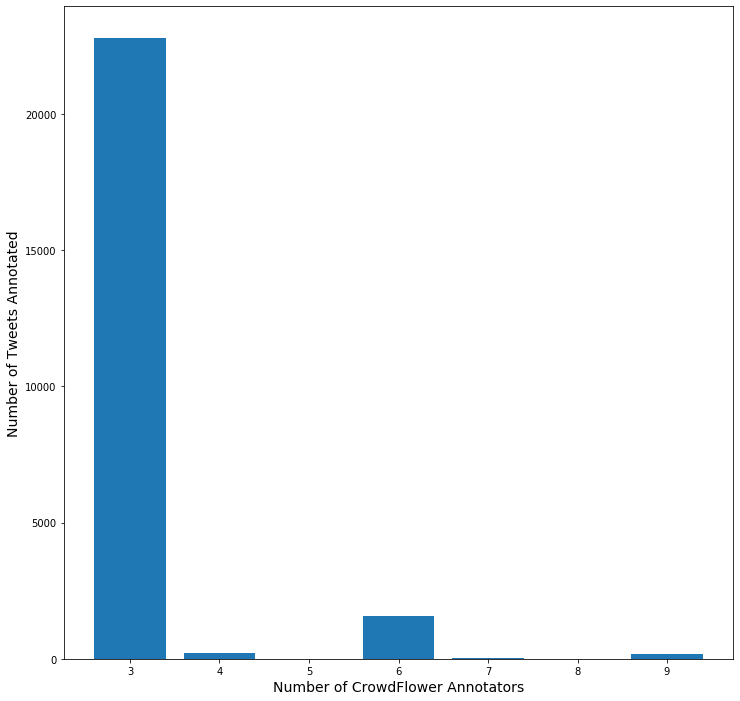

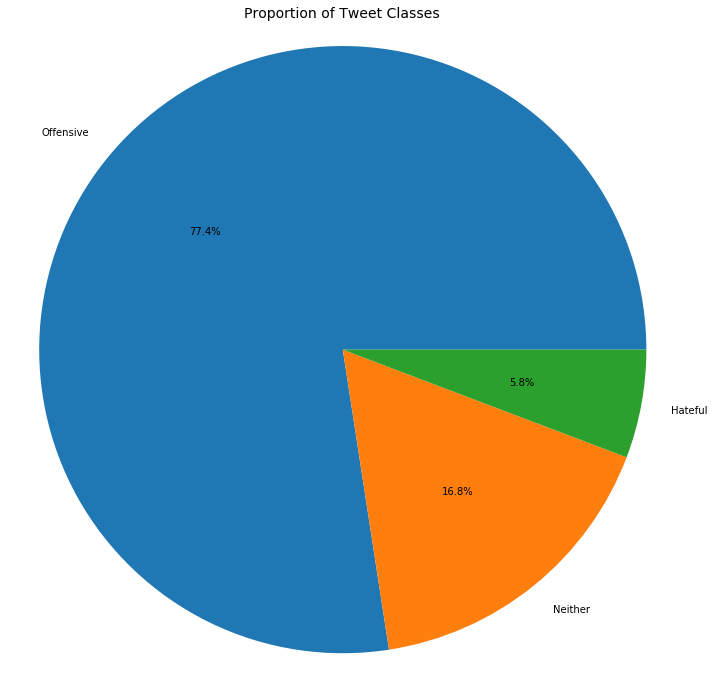

/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TypeError: 'list' object is not callable

In [89]:
from hate_speech_oop import HatebaseTwitter

# Getting Davidson's Hatebase Twitter Data
hb_path = getcwd() + "/hate_speech_detection/data/HatebaseTwitter"

# Initializing the HatebaseTwitter Class
hb = HatebaseTwitter(hb_path)

# Performing an Exploratory Data Analysis of the Hatebase Twitter Dataset
hb.eda()

# Extracting the Tweet TF-IDF, POS TF-IDF, and Other Tweet Features into a Multidimensional Data Matrix
features = hb.features()

feature_names = hb.feature_names()

In [47]:
df = pd.read_csv(f"{hb_path}/{listdir(hb_path)[0]}")

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [48]:
import pandas as pd
X = pd.DataFrame(features)
y = df['class'].astype(int)

In [54]:
y.head()

0    2
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [78]:
# Run the model 

# Penalty changed from l1 to l2 due to the solver being defaulted to lbfgs, which does not take l1 regularization
select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l2",C=0.01))
X_ = select.fit_transform(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
model = LinearSVC(class_weight='balanced',C=0.01, penalty='l2', loss='squared_hinge',multi_class='ovr').fit(X_, y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [80]:
y_preds = model.predict(X_)

In [66]:
report = classification_report(y, y_preds)

In [75]:
print(report)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1430
           1       0.94      0.91      0.93     19190
           2       0.75      0.86      0.80      4163

    accuracy                           0.88     24783
   macro avg       0.75      0.77      0.76     24783
weighted avg       0.89      0.88      0.89     24783



In [ ]:
final_features = select.get_support(indices=True) #get indices of features

# in Python 3, unicode is written as str
import sys
if sys.version_info[0] >= 3:
    unicode = str
    
print(final_features)
final_feature_list = [unicode(feature_names[i]) for i in final_features] #Get list of names corresponding to indices

In [ ]:
print(final_feature_list) # List not printing